Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


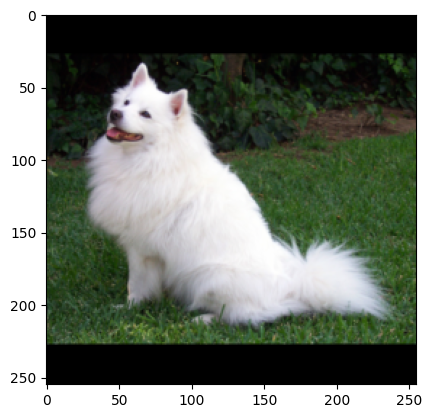

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x57600 and 256x120)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
from torchvision.transforms import v2

from main_lenet import LeNet5

model = LeNet5(bands=3)
model.load_state_dict(torch.load('mnist_cnn.pt'))
model.eval()

input_image = Image.open('dog.jpg')
preprocess = transform = transforms.Compose(
    [transforms.ToTensor(),
     v2.RandomHorizontalFlip(p=0.5),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.CenterCrop(size=max(input_image.size)),
     transforms.Resize(size=255)])
input_tensor = preprocess(input_image)

plt.imshow(np.moveaxis(input_tensor.numpy(), 0, -1))
plt.show()

input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)



# Read the categories
with open("cifar_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())